Progress: 0.0%
Progress: 3.6%
Progress: 7.1%
Progress: 10.7%
Progress: 14.3%
Progress: 17.9%
Progress: 21.4%
Progress: 25.0%
Progress: 28.6%
Progress: 32.1%
Progress: 35.7%
Progress: 39.3%
Progress: 42.9%
Progress: 46.4%
Progress: 50.0%
Progress: 53.6%
Progress: 57.1%
Progress: 60.7%
Progress: 64.3%
Progress: 67.9%
Progress: 71.4%
Progress: 75.0%
Progress: 78.6%
Progress: 82.1%
Progress: 85.7%
Progress: 89.3%
Progress: 92.9%
Progress: 96.4%
Simulation Complete


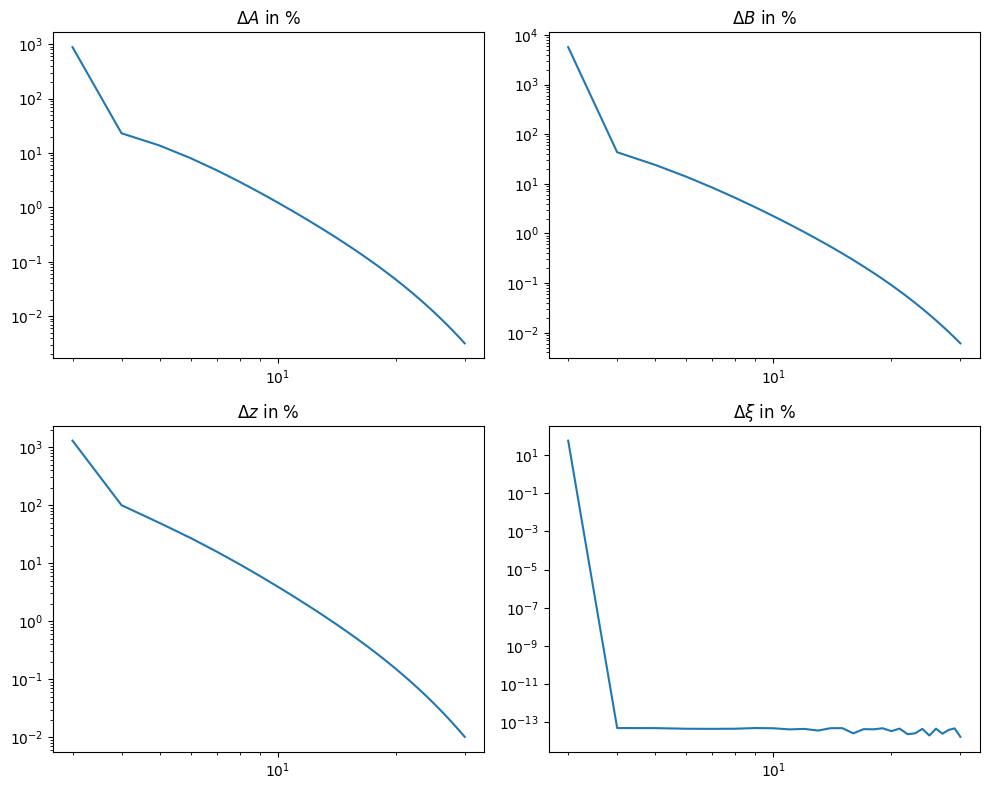

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from MyFixedPointFunctions import Fixed_Point_validation  



# ============================ Running the Simulation ============================ #

nT2 = 10
T2t = np.linspace(0.001, 2, nT2)
nLambda = 10
Lambda = np.linspace(1, 60, nLambda)
nPCt = np.arange(3, 31)

Amount_nPC = len(nPCt)
percent = 0.5 * 10**-13
dxi = np.zeros((2, Amount_nPC))
dA = np.zeros((2, Amount_nPC))
dB = np.zeros((2, Amount_nPC))
dz = np.zeros((2, Amount_nPC))

for indnPC in range(Amount_nPC):
    nPC = nPCt[indnPC]

    for indT2 in range(nT2):
        for indLambda in range(nLambda):
            T2 = T2t[indT2]
            T1 = Lambda[indLambda] * T2

            nvari = 1#max(1, int(round(2 * np.pi / nPC / (0.5 * np.pi / 180))))
            nPC_infty = 1000

            for indvari in range(nvari):
                A_inf, B_inf, z_inf, A_fin, B_fin, z_fin, Ab, Bb, zb, xib, xi_fin = Fixed_Point_validation(T1, T2, nPC, percent, indvari, nvari, nPC_infty)
            
            # Compute errors
                dxi_DFT = xi_fin
                dxi_bSSFP = xib
                dA_DFT = np.abs(A_inf - A_fin) / np.abs(A_inf) * 100
                dB_DFT = np.abs(B_inf - B_fin) / np.abs(B_inf) * 100
                dz_DFT = np.abs(z_inf - z_fin) / np.abs(z_inf) * 100
                dA_bSSFP = np.abs(A_inf - Ab) / np.abs(A_inf) * 100
                dB_bSSFP = np.abs(B_inf - Bb) / np.abs(B_inf) * 100
                dz_bSSFP = np.abs(z_inf - zb) / np.abs(z_inf) * 100

                # Store only the max errors
                dxi[1, indnPC] = max(dxi[1, indnPC], dxi_bSSFP)
                dA[1, indnPC] = max(dA[1, indnPC], dA_bSSFP)
                dB[1, indnPC] = max(dB[1, indnPC], dB_bSSFP)
                dz[1, indnPC] = max(dz[1, indnPC], dz_bSSFP)

                dxi[0, indnPC] = max(dxi[0, indnPC], dxi_DFT)
                dA[0, indnPC] = max(dA[0, indnPC], dA_DFT)
                dB[0, indnPC] = max(dB[0, indnPC], dB_DFT)
                dz[0, indnPC] = max(dz[0, indnPC], dz_DFT)

            if indLambda == 0 and indT2 == 0:
                    print(f"Progress: {indnPC/Amount_nPC*100:.1f}%")
print("Simulation Complete")

# ============================ Plotting ============================ #
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].loglog(nPCt, dA[1, :])
axes[0, 0].set_title(r'$\Delta A$ in %')

axes[0, 1].loglog(nPCt, dB[1, :])
axes[0, 1].set_title(r'$\Delta B$ in %')

axes[1, 0].loglog(nPCt, dz[1, :])
axes[1, 0].set_title(r'$\Delta z$ in %')

axes[1, 1].loglog(nPCt, dxi[1, :])
axes[1, 1].set_title(r'$\Delta \xi$ in %')

plt.tight_layout()
plt.show()


In [6]:

import numpy as np
nPC = 3

print("Original phi:", np.linspace(0, 2 * np.pi, nPC, endpoint=False))
print("Optimized phi:", np.linspace(0, 2 * np.pi, nPC)[:-1])

Original phi: [0.        2.0943951 4.1887902]
Optimized phi: [0.         3.14159265]
